In [ ]:
import csv
import numpy as np
import tensorflow as tf
from google.colab import files

In [ ]:
## File_uploader
uploaded=files.upload()


Saving test_dataset.csv to test_dataset.csv
Saving train_dataset.csv to train_dataset.csv


In [ ]:
## Get the number of rows in .csv file
def len_data(filename):
  i=0
  with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        for row in csv_reader:
            if first_line:
                # print("Ignoring first line")
                first_line = False
            else:
              i+=1
  return i

In [ ]:
## Get the list of the data for training
def get_train_data(filename):
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        temp_data = []
        temp_labels = []
        j = 0
        for row in csv_reader:
            if row[0]=="Area":
              row = False   
            else:              
              bean_data = row[0:16]
             ## bean_data_as_array = np.array_split(bean_data, 18)
              temp_data.append(bean_data)
              if row[16]=="CALI":
                temp_labels.append("0")
              elif row[16]=="SIRA":
                temp_labels.append("1")
              elif row[16]=="HOROZ":
                temp_labels.append("2")
              elif row[16]=="BARBUNYA":
                temp_labels.append("3")
              elif row[16]=="DERMASON":
               temp_labels.append("4")
              elif row[16]=="SEKER":
                temp_labels.append("5")
              else: 
                temp_labels.append("6")


        train_data = np.array(temp_data).astype('float')
        train_labels = np.array(temp_labels).astype('float')
        

    return  train_data, train_labels

training_data, training_labels = get_train_data('train_dataset.csv') 

## Check the shape of dataset list and label type
print(training_data.shape)
print(training_labels)
print(training_labels.shape)



(2500, 16)
[3. 4. 3. ... 0. 5. 2.]
(2500,)


In [ ]:
## Split the data for training into data for training and data for validation
leng = len_data('train_dataset.csv') -1
data_val = training_data[int(leng *.92):]
data_trained = training_data[:int(leng *.92)]

label_val = training_labels[int(leng *.92):]
label_trained = training_labels[:int(leng *.92)]
## Convert the dataset list to a numpy tensor 
data_val = np.expand_dims(data_val, axis=2)
data_trained = np.expand_dims(data_trained, axis=2)



In [ ]:
## Build the model using Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='softplus', input_shape=(16,)),
    tf.keras.layers.Dense(64, activation='softplus'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(7, activation=tf.nn.softmax)])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Fitting model 
history = model.fit(data_trained, label_trained,steps_per_epoch=leng / 128, epochs=700, batch_size=100, validation_data=(data_val, label_val))


Epoch 1/700
19/19 [==============================] - 1s 15ms/step - loss: 1679.0339 - accuracy: 0.1205 - val_loss: 879.3167 - val_accuracy: 0.1741
Epoch 2/700
19/19 [==============================] - 0s 6ms/step - loss: 630.1551 - accuracy: 0.1386 - val_loss: 389.2669 - val_accuracy: 0.1393
Epoch 3/700
19/19 [==============================] - 0s 5ms/step - loss: 471.0275 - accuracy: 0.1566 - val_loss: 305.5051 - val_accuracy: 0.1741
Epoch 4/700
19/19 [==============================] - 0s 5ms/step - loss: 221.1475 - accuracy: 0.1626 - val_loss: 382.3452 - val_accuracy: 0.1393
Epoch 5/700
19/19 [==============================] - 0s 5ms/step - loss: 251.2875 - accuracy: 0.1311 - val_loss: 268.7822 - val_accuracy: 0.0846
Epoch 6/700
19/19 [==============================] - 0s 4ms/step - loss: 223.1243 - accuracy: 0.1551 - val_loss: 246.3339 - val_accuracy: 0.0995
Epoch 7/700
19/19 [==============================] - 0s 5ms/step - loss: 215.1886 - accuracy: 0.1621 - val_loss: 241.5834 - val_

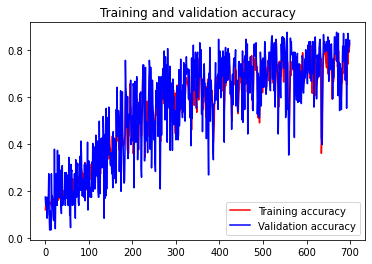

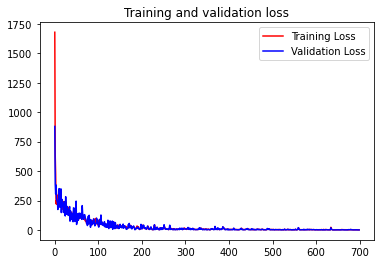

In [ ]:
## Model analysis
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
## Save the model as keras model file
from google.colab import files

model.save('bean_classification.h5')
files.download('bean_classification.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>